Unsupervised K-means clustering analysis of unlabelled data

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.neighbors import NearestNeighbors

In [122]:
data = pd.read_excel('Standardization_new.xlsx')
data = data.drop('ID', axis = 1)
data.head(10)                     

,raven,motion,vispa,nwrt,wm
0,1,14,13,6,5
1,2,4,20,2,11
2,2,8,23,2,10
3,2,4,29,5,11
4,5,4,32,2,4
5,3,7,27,2,8
6,1,5,30,1,8
7,6,10,12,1,3
8,1,4,22,2,10
9,3,8,26,7,3


In [69]:
data_norm = pd.DataFrame(minmax_scale(data))
data_norm.columns = ['raven', 'motion', 'vispa', 'nwrt', 'wm']
data_norm.head(10)

,raven,motion,vispa,nwrt,wm
0,0.111111,0.722222,0.111111,0.714286,0.214286
1,0.222222,0.166667,0.370370,0.142857,0.642857
2,0.222222,0.388889,0.481481,0.142857,0.571429
3,0.222222,0.166667,0.703704,0.571429,0.642857
4,0.555556,0.166667,0.814815,0.142857,0.142857
5,0.333333,0.333333,0.629630,0.142857,0.428571
6,0.111111,0.222222,0.740741,0.000000,0.428571
7,0.666667,0.500000,0.074074,0.000000,0.071429
8,0.111111,0.166667,0.444444,0.142857,0.571429
9,0.333333,0.388889,0.592593,0.857143,0.071429


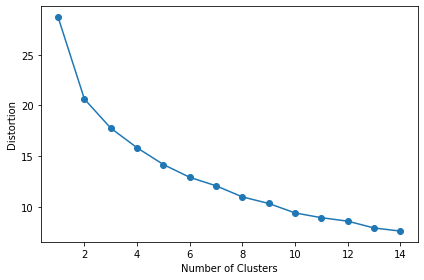

In [124]:
distortions = []
for i in range (1,15):
    data_km = KMeans(n_clusters=i,
                         init='k-means++',
                         n_init = 10,
                         max_iter = 500,
                         tol = 1e-04,
                         random_state = 0)
    data_km.fit(data_norm)
    distortions.append(data_km.inertia_)
plt.plot(range(1,15), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [116]:
data_km2 = KMeans(n_clusters=2,
                         init='k-means++',
                         n_init = 10,
                         max_iter = 500,
                         tol = 1e-04,
                         random_state = 0)
y_km2 = data_km2.fit_predict(data_norm)

In [117]:
cluster_labels = np.unique(y_km2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_norm,
                                    y_km2,
                                    metric = 'euclidean')

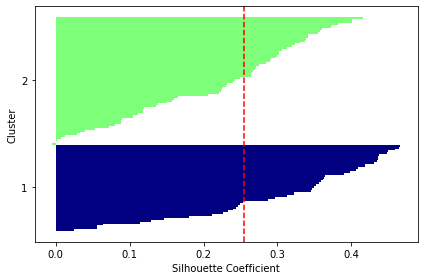

In [118]:
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color = 'red',
           linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

In [119]:
s2 = metrics.silhouette_score(data_norm, data_km2.labels_)
print(f'Silhouette Coefficient for the Proffilo Dataset Clusters: {s2:.2f}')  

Silhouette Coefficient for the Proffilo Dataset Clusters: 0.26


In [120]:
data_db = DBSCAN(eps = 0.6,
                min_samples = 5)
data_db.fit(data_norm)
labels = data_db.labels_
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [121]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[data_db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
s = metrics.silhouette_score(data_norm, data_db.labels_)
print(f'Silhouette Coefficient for the Proffilo Dataset Clusters: {s:.2f}')  

Estimated number of clusters: 1
Estimated number of noise points: 1
Silhouette Coefficient for the Proffilo Dataset Clusters: 0.43


[0.06676947 0.06676947 0.07142857 0.09259259 0.09259259 0.09777629
 0.09777629 0.09777629 0.09777629 0.09777629 0.11111111 0.11111111
 0.124226   0.13353894 0.13353894 0.13718404 0.13718404 0.13718404
 0.14285714 0.14285714 0.14285714 0.14463425 0.14814815 0.14814815
 0.15144203 0.15144203 0.15713484 0.15822229 0.15822229 0.15822229
 0.16131059 0.1614407  0.16395715 0.16910536 0.16910536 0.16910536
 0.17023969 0.1707323  0.1707323  0.17260764 0.1735982  0.1735982
 0.17606014 0.17653651 0.17653651 0.18098023 0.18132793 0.18461742
 0.18473111 0.18473111 0.18507177 0.18507177 0.18783069 0.18783069
 0.18931525 0.18931525 0.19456588 0.19555258 0.19555258 0.19555258
 0.19805965 0.2003084  0.20234204 0.20570378 0.20611165 0.21266287
 0.21277803 0.21596118 0.22222222 0.22405705 0.22405705 0.22405705
 0.22491441 0.22491441 0.22906142 0.23167415 0.23379419 0.24039163
 0.24243546 0.24286809 0.25077914 0.25111381 0.25885402 0.25925926
 0.26190476 0.26190476 0.26451058 0.2648279  0.26605393 0.28659

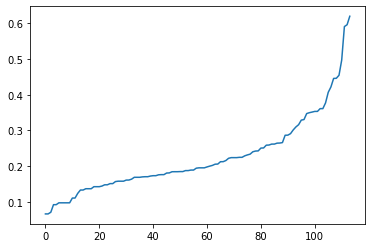

In [103]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data_norm)
distances, indices = nearest_neighbors.kneighbors(data_norm)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()